In [1]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset to pandas dataframe
wine_quality = pd.read_csv(r"C:\Users\Sid's Lappy\Downloads\archive.zip")

In [3]:
# first 5 rows in the dataset
# shape of the dataset(number of rows against number of columns
wine_quality.shape

(1599, 12)

In [4]:
wine_quality.head()
# first 5 rows in the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Checking for missing values
wine_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Data Analysis and Visualisation
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


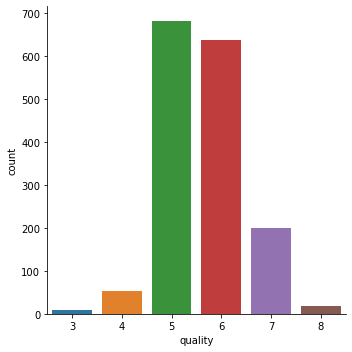

In [7]:
# Number of values for each quality
sns.catplot(x= 'quality', data = wine_quality, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

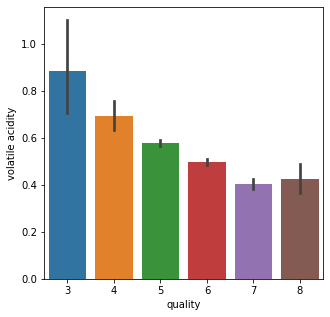

In [8]:
# volatile acidity vs quality
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality',y= 'volatile acidity', data = wine_quality)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

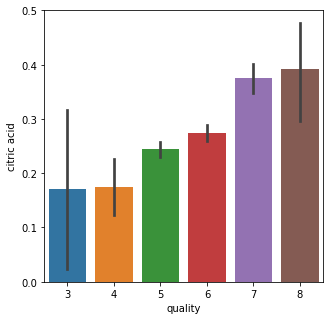

In [9]:
# citric acid vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x= 'quality', y= 'citric acid', data = wine_quality)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

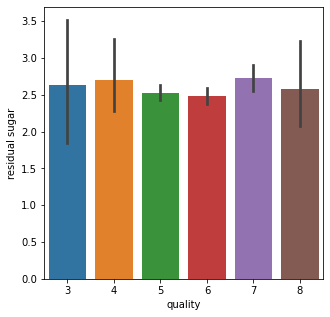

In [10]:
# residual sugar vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_quality)


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

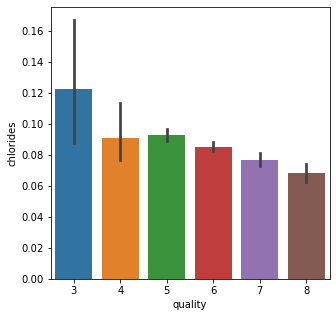

In [11]:
# chlorides vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_quality)


<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

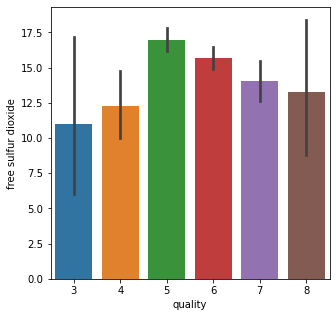

In [12]:
# free sulfur dioxide vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_quality)


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

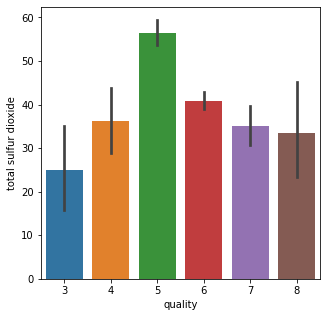

In [13]:
#  total sulfur dioxide vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_quality)


<AxesSubplot:xlabel='quality', ylabel='density'>

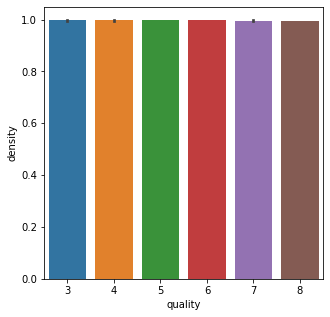

In [14]:
# density vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'density', data = wine_quality)


<AxesSubplot:xlabel='quality', ylabel='pH'>

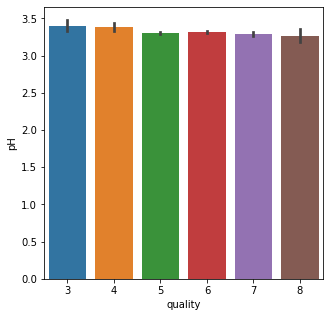

In [15]:
# pH vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'pH', data = wine_quality)


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

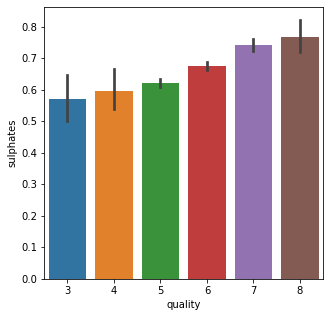

In [16]:
# sulphates vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_quality)


In [17]:
Correlation = wine_quality.corr()

<AxesSubplot:>

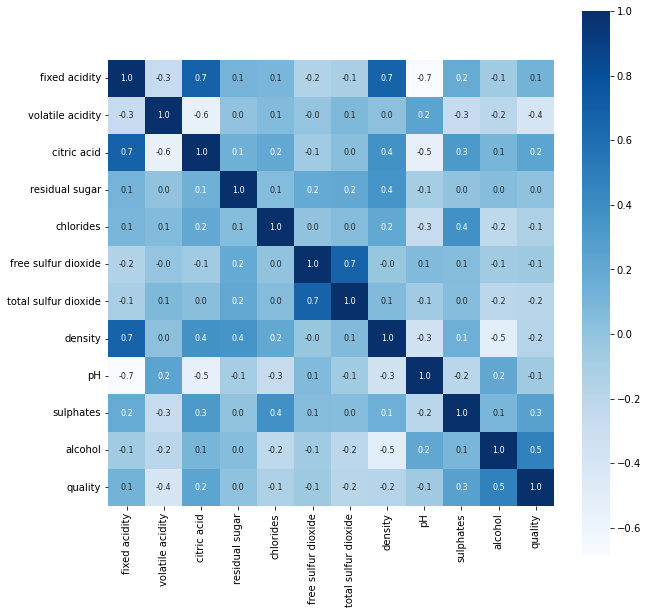

In [18]:
#  constructing a heatmap to find a correlation between the columns
plt.figure(figsize = (10,10))
sns.heatmap(Correlation, cbar = True, square=True,fmt = '.1f',  annot= True, annot_kws={'size': 8 }, cmap = 'Blues')

In [34]:
# Data Preprocessing
X = wine_quality.drop('quality', axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [35]:
y = wine_quality['quality'].apply(lambda y_value:1 if y_value >= 7 else 0 )
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [36]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [37]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1071,) (528,)


In [42]:
# Model Training 
# RANDOM FOREST CLASSIFIER
Model = RandomForestClassifier()

In [43]:
Model.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# Model Evaluation 
# Accuracy Scores
X_test_predictions = Model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predictions,y_test)

In [46]:
print('accuracy :', test_data_accuracy)

accuracy : 0.8787878787878788


In [47]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

In [49]:
# Changing the input data into a numpy array
input_data_as_np = np.asarray(input_data)

In [50]:
# reshaping the data as we are trying to predict for one ibstance only
input_data_reshaped = input_data_as_np.reshape(1,-1)

In [58]:
prediction = Model.predict(input_data_reshaped)
print(prediction)

[0]


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
if (prediction[0] == 1):
    print('Good quality wine')
else:
    print('bad quality wine')



Good quality wine


In [55]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

In [56]:
input_data_as_np = np.asarray(input_data)

In [57]:
input_data_reshaped = input_data_as_np.reshape(1,-1)

In [59]:
prediction = Model.predict(input_data_reshaped)
print(prediction)

[0]


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
if (prediction[0] == 1):
    print('Good quality wine')
else:
    print('bad quality wine')

bad quality wine


In [ ]:
# The End